In [1]:
# Load required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

%matplotlib inline

from sklearn import tree      # Import tree classifier 
from sklearn.model_selection import train_test_split     # Import train_test_split function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score      # Import scikit-learn metrics module for accuracy calculation


In [3]:
# Load the Final Project dataset 

location = "datasets/ks-projects-201801.csv"

df = pd.read_csv(location)
df.head()     # Get first five data rows

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,status,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
#Perform exploratory analysis and their corresponding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
status              378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
# Count the categories
df['category'].value_counts()

Product Design       22314
Documentary          16139
Music                15727
Tabletop Games       14180
Shorts               12357
Video Games          11830
Food                 11493
Film & Video         10108
Fiction               9169
Fashion               8554
Nonfiction            8318
Art                   8253
Apparel               7166
Theater               7057
Technology            6930
Rock                  6758
Children's Books      6756
Apps                  6345
Publishing            6018
Webseries             5762
Photography           5752
Indie Rock            5657
Narrative Film        5188
Web                   5153
Comics                4996
Crafts                4664
Country & Folk        4451
Design                4199
Hip-Hop               3912
Hardware              3663
                     ...  
Couture                275
Blues                  268
Animals                255
Fabrication Tools      250
Makerspaces            238
Printing               238
M

In [18]:
# Create an array of top ten categories
top_ten_array = ['Product Design', 'Documentary', 'Music', 'Tabletop Games', 'Shorts', 'Video Games', 'Food', 'Film & Video', 'Fiction', 'Fashion']
df.loc[df['category'].isin(top_ten_array)]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,status,backers,country,usd pledged,usd_pledged_real,usd_goal_real
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015,1283.00,canceled,14,US,1283.00,1283.00,19500.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,12/21/2014,1000.0,12/1/2014,1205.00,successful,16,US,1205.00,1205.00,1000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,5/29/2014,125000.0,4/24/2014,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,8/10/2014,65000.0,7/11/2014,6240.57,canceled,43,US,6240.57,6240.57,65000.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,5/3/2017,5000.0,4/5/2017,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,8/17/2012,250.0,8/2/2012,250.00,successful,7,US,250.00,250.00,250.00
19,1000071625,Boco Tea,Food,Food,USD,6/2/2012,5000.0,5/3/2012,1781.00,failed,40,US,1781.00,1781.00,5000.00
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,12/30/2013,20000.0,11/25/2013,34268.00,successful,624,US,34268.00,34268.00,20000.00
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,1/6/2011,10000.0,12/7/2010,15827.00,successful,147,US,15827.00,15827.00,10000.00


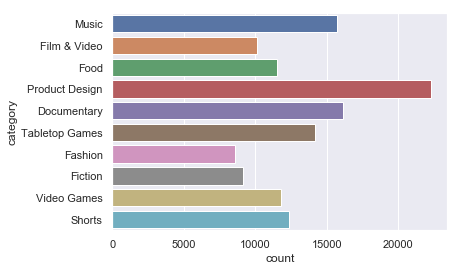

In [36]:
# Create a bar chart of top ten category count
sns.set(style="darkgrid")
sns.countplot(y='category', data=df.loc[df['category'].isin(top_ten_array)])